In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

i = 0, W = 0.5053775906562805, b = 1.6744669675827026
i = 10, W = 3.3138108253479004, b = 7.296105861663818
i = 20, W = 4.702357292175293, b = 7.899724960327148
i = 30, W = 5.388882637023926, b = 7.964538097381592
i = 40, W = 5.728315353393555, b = 7.971497535705566
i = 50, W = 5.896137237548828, b = 7.972244739532471
i = 60, W = 5.979111671447754, b = 7.972324371337891
i = 70, W = 6.02013635635376, b = 7.9723334312438965
i = 80, W = 6.040419101715088, b = 7.9723334312438965
i = 90, W = 6.050447940826416, b = 7.9723334312438965
i = 100, W = 6.055406093597412, b = 7.9723334312438965
final result: W = 6.055406093597412, b = 7.9723334312438965


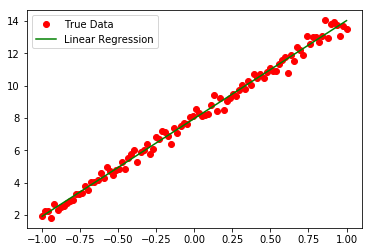

In [2]:
# 1. generate some datas
true_x = np.linspace(-1, 1, 100)
true_y = 6 * true_x + 8 + np.random.randn(*true_x.shape) * 0.33

# 2. define some necessary variable or placeholder
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

W = tf.get_variable('weight', initializer=tf.constant(0.1))
b = tf.get_variable('bias', initializer=tf.constant(0.1))

# 3. linear regression model
y_pred = tf.multiply(x, W) + b

# 4. loss function
loss = tf.square(y - y_pred)

# 5. train operation
train_op = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

# 6. Start session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(101):
        sess.run(train_op, feed_dict={x: true_x, y: true_y})

        if i % 10 == 0:
            print('i = {}, W = {}, b = {}'.
                  format(i, sess.run(W), sess.run(b)))

    print('final result: W = {}, b = {}'.format(sess.run(W), sess.run(b)))

    plt.plot(true_x, true_y, 'ro', label="True Data")
    plt.plot(true_x, sess.run(W) * true_x + sess.run(b), 'g', label='Linear Regression')
    plt.legend()
    plt.show()